# Sparse and Compressible Signal

## 1. Sparse signal

Sparse signal can be expressed by the vector whose entries are almost zero.
This vector $x$ is defined as below.

$
x \in \Sigma_k \\
$

where $\Sigma_k$ is a set of $k$-sparse vectors.
$k$-sparse means that the signal has k non zeros entries, and other entries are zero.
This $k$-sparse vector set is defined as below.

$
\Sigma_k = \{ z ~~ : ~~ ||z||_0 = k \} \\
z \in \mathbb{R}^N
$

where $||\cdot||_0$ is $l_0$ norm and equals to the number of non-zero entries in the vector.
For example, below signal is a 2-sparse, 10 entries sparse signal.

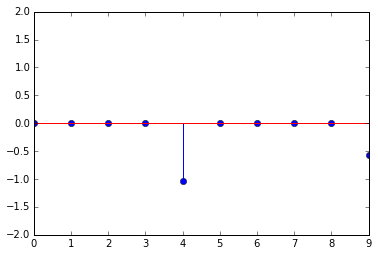

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

N, k = 10, 2
n = np.arange(N)
xs = sparse(N,k)

plt.ylim(-2,2)
plt.stem(n, xs)
plt.show()

To show an example, I introduced a function, a random generator of sparse signal.
This makes all-zero vector at first, and replace zero values in $k$ random positions to random values which have standard normal distribution.
By using this function, k-sparse signal

In [7]:
import numpy as np

def sparse(n, k):
    u"""
        [return]  k-sparse vector
        n:        vector length
        k:        number of nonzero entries
    """
    z   = np.zeros(n)
    for i in np.random.choice( np.arange(n), k, replace=None ):   # supports of nonzero entries
        z[i] = np.random.randn()
    return z


### Metrics of Sparsity: signal density

Next, we naturally want a metrics to measure how sparse the signal is.
It is defined as below.
This is called signal density and means how it is not sparse.

$
\rho = k/n
$

where $n$ is signal length and $k$ is the number of non-zero entires.

## 2. Compressible signal

Sparse is just the ideal concept. In real situation, it is difficult to find true sparse vector.
Because of this, we have to prepare more practical concept called **compressible** signal.
Compressible signal is the pseudo-sparse signal, most entries of which are near zeros and a few entries of which are non zeros.


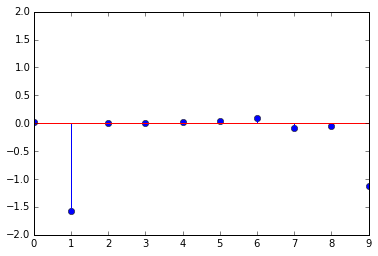

In [13]:
N, k = 10, 2
n = np.arange(N)
xc = compressible(N,k, e=0.05)

plt.ylim(-2,2)
plt.stem(n, xc)
plt.show()

In [14]:
import numpy as np

def compressible(n, k, e):
    u"""
        [return]  k-compressible vector
        n:        vector lenth
        k:        number of nonzero entries
        e:        noise level
    """
    z    = np.zeros(n)
    N    = np.arange(n)
    K    = np.random.choice( N, k, replace=None )
    K_c  = [ i for i in N if i not in K]

    for k in K:   # supports of nonzero entries
        z[k] = np.random.randn() + 0.2
    for i in K_c:
        z[i] = e * np.random.randn()
        
    return z


### Metrics of Compressiblity: compression rate
The compression rate $\alpha = m/n$, where m is the number of measurements.

### Metrics of Compressibility: $l_p$ norm

Compressibilty is defined as below, depends on  $k$ (sparsity) and $p$ (dimension of norm).

$ \sigma_k (x)_p = \min\limits_{\hat{x} \in \Sigma_k} || x - \hat{x} ||_p $

This means, when we make k-sparse vector, of which k largest entries of $\hat{x}$ equals to entries of $x$, so these differences of k largest entries are to be zero, and then left p-norm residuals in $x$ are summed up to $\sigma_k (x)_p$.
Frankly speaking, therefore, compressibility is the $l_p$-norm residual after taking large entries by k-sparse entries.

In [7]:
def compressibility(k, x, p):
    
    K     = np.argsort(x)[:k]
    n     = x.shape[0]
    for k in K:
        x[k] = 0.0
    return np.linalg.norm(x,2)


N, k  = 10, 2
n     = np.arange(N)
x     = compressible(N,k, 0.05)
print "[compressibility]:  %f" % compressibility(k, x, p=2)


[compressibility]:  1.106048


### Compressibility (decay rate)

$c_i$ are coefficients which are sorted in descendant,  $ |c_1| \geq |c_2| \geq ... |c_n| $. 

$
|c_i| \leq {C_1}^{i-q}
$

$C_1$ and $q$ are positive constants, ($0 < C_1 < 1$, $q>0$) .
The smaller $C_1$ is and the larger $q$ is, the higher compressibility becomes.


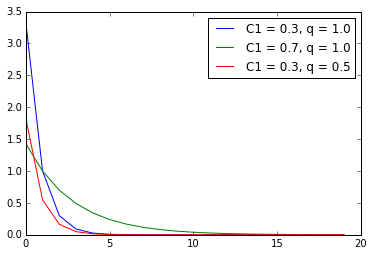

In [8]:
C1, q1  = 0.3, 1.0
C2, q2  = 0.7, 1.0
C3, q3  = 0.3, 0.5

i   = np.arange(20)
c1  = np.power( C1, i-q1 )
c2  = np.power( C2, i-q2 )
c3  = np.power( C3, i-q3 )

plt.plot(i, c1, label='C1 = %.1f, q = %.1f' % (C1, q1) )
plt.plot(i, c2, label='C1 = %.1f, q = %.1f' % (C2, q2) )
plt.plot(i, c3, label='C1 = %.1f, q = %.1f' % (C3, q3) )
plt.legend()
plt.show()
